In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score

In [3]:
data = pd.read_csv('musk_csv.csv')

In [4]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [5]:
data.isna().sum() #checking missing values

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [6]:
# Explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# Now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [7]:
# Subset numeric features: numeric_cols
numeric_cols=data.select_dtypes(include=[np.number])

In [9]:
# Iteratively impute
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
data_imp_iter = imp_iter.fit_transform(numeric_cols)
# Convert returned array to DataFrame
df =pd.DataFrame(data_imp_iter,columns=numeric_cols.columns)

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 168 entries, ID to class
dtypes: float64(168)
memory usage: 8.5 MB
None


In [11]:
df.shape

(6598, 168)

In [12]:
train,test = train_test_split(df, random_state=30, test_size = 0.2)
Xtrain = train.iloc[:,3:-1]
Ytrain = train.iloc[:,-1:]
Xtest = test.iloc[:,3:-1]
Ytest = test.iloc[:,-1:]
Xtrain.shape

(5278, 164)

In [13]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

C:\Users\RODDSI\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\RODDSI\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\RODDSI\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\RODDSI\Anaconda3\envs\tensorflow_c

In [14]:
a=[1]*Xtrain.shape[0]
Xtrain["demo"]=a
Xtrain.shape

C:\Users\RODDSI\Anaconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(5278, 165)

In [15]:
b=[1]*Xtest.shape[0]
Xtest["demo"]=b
Xtest.shape

C:\Users\RODDSI\Anaconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(1320, 165)

In [17]:
x_train=Xtrain.values.reshape(Xtrain.shape[0],33,5,1)
x_test=Xtest.values.reshape(Xtest.shape[0],33,5,1)

In [18]:
x_train.shape

(5278, 33, 5, 1)

In [24]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(33,5,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
history = model.fit(x_train,Ytrain,batch_size=128,epochs=17,validation_data=(x_test,Ytest))
score=model.evaluate(x_test,Ytest,verbose=0)
print(score)

Train on 5278 samples, validate on 1320 samples
Epoch 1/17
5278/5278 [==============================] - 9s 2ms/step - loss: 2.6431 - acc: 0.8314 - val_loss: 2.3567 - val_acc: 0.8538
Epoch 2/17
5278/5278 [==============================] - 2s 394us/step - loss: 2.5200 - acc: 0.8401 - val_loss: 2.3567 - val_acc: 0.8538
Epoch 3/17
5278/5278 [==============================] - 2s 401us/step - loss: 1.9161 - acc: 0.8433 - val_loss: 0.6867 - val_acc: 0.8045
Epoch 4/17
5278/5278 [==============================] - 2s 415us/step - loss: 0.3036 - acc: 0.8975 - val_loss: 0.1411 - val_acc: 0.9409
Epoch 5/17
5278/5278 [==============================] - 2s 398us/step - loss: 0.1824 - acc: 0.9316 - val_loss: 0.1379 - val_acc: 0.9477
Epoch 6/17
5278/5278 [==============================] - 2s 409us/step - loss: 0.1581 - acc: 0.9333 - val_loss: 0.1255 - val_acc: 0.9576
Epoch 7/17
5278/5278 [==============================] - 2s 414us/step - loss: 0.1401 - acc: 0.9432 - val_loss: 0.1019 - val_acc: 0.9515
Ep

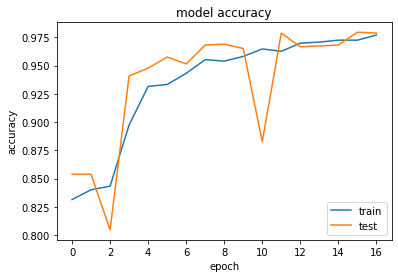

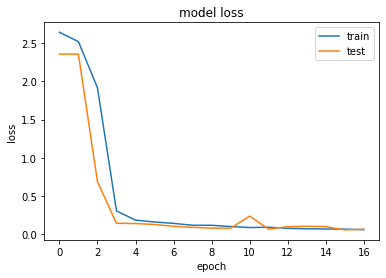

In [30]:
%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [31]:
print("f1_score:",f1_score(Ytest,model.predict_classes(x_test),))
print("recall:",recall_score(Ytest,model.predict_classes(x_test),))
print("precision:",precision_score(Ytest,model.predict_classes(x_test)))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

f1_score: 0.9251336898395722
recall: 0.8963730569948186
precision: 0.9558011049723757
Validation Loss: 0.0635519825430079
Validation Accuracy: 0.9787878787878788
